# 第3部　記述統計

## 4章　1変量データの統計量

本章では1変量データを対象としたさまざまな統計量を紹介し、Pythonでの実装方法を解説します。統計量の説明では数式を使います。数式が難しいと感じたら第3部第2章を参照してください。プログラムが難しいと感じたら、第2部第3章と第4章を参照してください。 サンプルサイズ・合計値・平均値という単純な指標から紹介し、データのばらつきを評価する指標である分散と標準偏差を解説します。続いて分散を利用した変動係数・標準化について解説します。 次にデータを昇順に並び替えたうえで、順位に基づく統計量を導入します。そして最頻値と呼ばれる度数に基づく統計量を導入します。最後に、さまざまな指標をまとめて計算できる便利な関数を紹介します。

### 4-1 実装：分析の準備

必要なライブラリの読み込みなどを行います。scipyは科学技術計算を行う際に便利なライブラリです。scipyから特に統計処理に特化したstatsモジュールを読み込みました。

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd

# 複雑な統計処理を行うライブラリ
from scipy import stats

In [ ]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)

### 4-2 分析対象となるデータの用意

分析対象となるデータを用意します。2通りの方法で同じデータを用意します。

#### 2-A numpyアレイで用意

numpyのアレイでデータを用意します。魚の体長を10個体だけ記録したデータです。名前はfish_lengthとします。

In [ ]:
fish_length = np.array([2,3,3,4,4,4,4,5,5,6])
fish_length

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

#### 2-B CSVファイルから読み込み

データはCSVファイルとして保存することが多いと思います。アレイで用意したデータと同じデータを、pandasのデータフレームとして読み込みます。名前は末尾に_dfをつけてfish_length_dfとします。

In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving 3-4-1-fish-length.csv to 3-4-1-fish-length.csv


In [ ]:
# データの読み込み
# fish_length_df = pd.read_csv('3-4-1-fish-length.csv')
fish_length_df = pd.read_csv(io.BytesIO(uploaded['3-4-1-fish-length.csv']))
print(fish_length_df)

   length
0       2
1       3
2       3
3       4
4       4
5       4
6       4
7       5
8       5
9       6


#### 2-C データフレームとアレイの変換

第2部第4章の復習ですが、データフレームをアレイに変換することは難しくありません。1変量の場合は、列名を指定したうえでさらにto_numpy()とつけることでアレイとして扱えます。すなわちfish_length_df.length.to_numpy()はアレイであるfish_lengthと同様に扱えます。これは以下のコードで確認できます。すべての要素がTrueなので、すべて等しいことがわかります。

In [ ]:
# データフレームもアレイに変換できる
fish_length_array = fish_length_df.length.to_numpy()
print(fish_length_array)

fish_length_df.length.to_numpy() == fish_length

array([ True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

### 4-3 実装：サンプルサイズ

標本のサンプルサイズを取得します。len関数を使います。まずはアレイに適用します。10個のデータがあるので結果は10です。

In [ ]:
# サンプルサイズ
len(fish_length)

10

続いてデータフレームに適用します。len関数を使うことで行数が取得できます。

In [ ]:
# サンプルサイズ(データフレームの行数)
len(fish_length_df)

10

データフレームはアレイに変換してから処理をしても構いませんし、データフレームのまま処理を実行できることもあります。両方のやり方を知っておくと便利です。しかし、複数のやり方を併記すると混乱を招くかもしれません。本章では、基本的にアレイを対象に実行します。 ただしnumpyとpandasで「同じ名前の関数なのに、処理の結果が異なる」ということもまれにあります。その場合には適宜注意を促します。

### 4-4 実装：合計値

標本の合計値を計算します。いろいろな実装方法があります。本節ではアレイとデータフレームの両方を対象とします。

#### 4-A 基本的な計算方法

合計値を計算するだけでもいろいろな方法があります。読者の方が混乱するのを避けるために、本書ではなるべくnumpyの関数を利用する方法で統一します。必要に応じてscipyのstatsの機能を使います。

numpyの関数を使って合計値を計算する場合はnp.sum関数を使います。まずはアレイを対象に適用します。結果は2+3+3+4+4+4+4+5+5+6=40です。データフレームにも同様に適用できます。

In [ ]:
# 合計
np.sum(fish_length)

40

In [ ]:
# 合計
np.sum(fish_length_df)

length    40
dtype: int64

#### 4-B その他の計算方法

Pythonを扱った教科書によっては以下のような方法が提示されていることもあると思います。結果は変わりませんが、読者の混乱を防ぐために、本書では明示的にnp.sum関数を使う方法を中心に使います。

In [ ]:
# アレイが持つsum関数を実行
fish_length.sum()

40

In [ ]:
# データフレームが持つ関数を実行
fish_length_df.sum()

length    40
dtype: int64

### 4-5 実装：標本平均

標本平均を計算します。平均値の計算式を再掲します。ただしは標本$x^̄$の平均値であり、nはサンプルサイズです。

#### 5-A 計算方法の確認

アレイを対象にして、Pythonで平均値を計算します。標本平均を定義通りに実装します。まずはサンプルサイズを取得します。続いて合計値を計算します。合計値をサンプルサイズで除すことで平均値が計算できます。

In [ ]:
# サンプルサイズ
n = len(fish_length)
n

10

In [ ]:
# 合計値
sum_value = np.sum(fish_length)
sum_value

40

In [ ]:
# 平均値の計算
x_bar = sum_value / n
x_bar

4.0

#### 5-B 関数を使った効率的な実装


In [ ]:
# 関数を使った平均値の計算
np.mean(fish_length)

np.float64(4.0)

### 4-6 用語：標本分散

データのばらつきを評価する指標である分散を導入します。

#### 6-A 分散の定義

平たく言うと、分散は「データが平均値とどれだけ離れているか」を表した指標です。標本から計算された分散を標本分散と呼びます。 平均値はデータの代表値としてしばしば使われます。しかし、その代表値がデータとかけ離れているときに、代表値だけを見てデータの解釈をするのは危険です。 平均値の近くにデータがちゃんと寄っていれば、標本分散は小さくなります。データが平均値から遠くに離れているようであれば、標本分散は大きくなります。 本書では、標本分散を記号s2と表記します。計算式に2乗する処理が入っているので、記号にもそれを入れています。

$s^2=\frac{1}{n}Σ_{i=1}^n(x_i-x^̄)^2$

平均値$x^̄$と個別のデータ$x_i$が離れていれば離れているほど、$(x_i-x^̄)^2$は大きな値をとります。$(x_i-x^̄)^2$は平均値とデータとの距離のようなものだとみなせます。なお、データと平均値の差を**偏差**と呼び、分散の分子を**偏差平方和**と呼びます。

#### 6-B 分散の定義

補足的に、厳密ではありませんが分散の直観的なイメージを共有します。 平均と分散という2つの指標を使うことで、データのおおよその形状を知ることができます。図3-4-1は、横軸に魚の体長を置いた模式図です。黒丸や白丸は、データ点を示しています。グレーの範囲が私たちのイメージする「データの形状」だと思ってください。

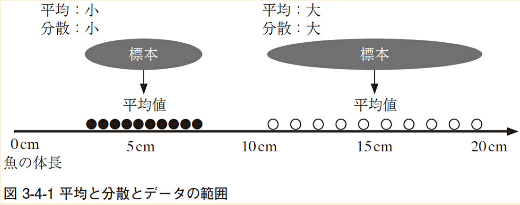

データの範囲を見るだけならば、最大値・最小値を見るだけで十分です。しかし「たまたま1つか２つ極端な値があっただけ」でも、最大値・最小値の幅は広くなってしまいます。

例えば図3-4-2では、2つの標本において、最大値と最小値の幅はほぼ同じになっています。しかし、直観的には「データの形状」が異なっているとみなしたいところですね。分散は「データが平均値とどれだけ離れているか」を表した指標なので、このようなときに効果を発揮します。

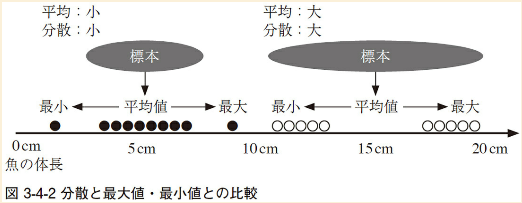

なお、平均値と分散だけでは、データの形状を正しく判断できないこともしばしばあります。この場合は、ヒストグラムなども利用しましょう。

### 4-7 実装：標本分散

アレイを対象にして標本分散を計算します。

#### 7-A 計算方法の確認

アレイを対象にして標本分散を計算します。

In [ ]:
# 標本分散
s2 = np.sum((fish_length - x_bar) ** 2) / n
s2

1.2

#### 7-B 実装コードの解読

コードがやや複雑なので、順を追って実装コードの解説をします。まずはアレイで用意した魚の体長データxiを確認します。

In [ ]:
fish_length

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [ ]:
fish_length - x_bar

array([-2., -1., -1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.])

In [ ]:
(fish_length - x_bar) ** 2

array([4., 1., 1., 0., 0., 0., 0., 1., 1., 4.])

In [ ]:
np.sum((fish_length - x_bar) ** 2)

12.0

#### 7-B 関数を使った効率的な実装

np.var関数を使うと簡単に計算できます。ただし間違いをなくすためにddof=0という引数は必ず指定してください。ddofという引数の意味は4-9節で解説します。

In [ ]:
# 関数を使った標本分散
np.var(fish_length, ddof=0)

1.2

### 4-7 用語：不偏分散

記述統計で分散と呼ぶ場合は、標本分散s2を指すことが多いです。ただし、本書では第5部以降で推測統計を解説します。推測統計では不偏分散や不偏標本分散と呼ばれる分散を使うことが多いです。不偏分散は以下のようにして計算されます。本書では見分けをつけやすくするため、不偏分散を記号u2と表記します。「不偏」の英語であるunbiasedの頭文字を意図しています。

サンプルサイズではなく、サンプルサイズから1を差し引いたもので除します。 不偏分散を理解するためには、推測統計の考え方を理解する必要があります。そのため現時点で不偏分散について理解できなくても大丈夫です。詳しくは第5部第4章で解説します。ここでは、不偏分散の役割を直観的に紹介するにとどめます。

### 4-9 実装：不偏分散

#### 9-A 計算方法の確認

In [ ]:
# 不偏分散
u2 = np.sum((fish_length - x_bar) ** 2) / (n - 1)
u2

1.3333333333333333

In [ ]:
# 小数点以下第3位で丸める
round(u2, 3)

1.333

#### 9-B 関数を使った効率的な実装

In [ ]:
# 不偏分散
round(np.var(fish_length, ddof=1), 3)

1.333

#### 9-C ライブラリの違いに注意

numpyとpandasでともにvarという関数があり、両者は違うことに注意してください。numpyのvar関数では、ddofを指定しない場合は標本分散を計算する。一方で、pandasのvar関数では、ddofを指定しない場合は不変分散を計算する。

In [ ]:
# numpy(標準は標本分散)
np.var(fish_length_df)

length    1.2
dtype: float64

In [ ]:
# pandas(標準は不偏分散)
fish_length_df.var()

length    1.333333
dtype: float64

In [ ]:
# ddofを指定
fish_length_df.var(ddof=0)

length    1.2
dtype: float64

In [ ]:
# 参考：ライブラリのバージョン(書籍には載っていないコードです)
print('numpyのバージョン', np.__version__)
print('pandasのバージョン', pd.__version__)

numpyのバージョン 1.20.3
pandasのバージョン 1.3.4


### 4-10 用語：標準偏差

標準偏差とは、分散の平方根をとったものです。分散はデータを2乗することで計算されている。

$s=\sqrt{s^2}=\sqrt{\frac{1}{n}Σ_{i=1}^n(x_i-x^̄)^2}$

### 4-11 実装：標準偏差

#### 11-A 計算方法の確認

In [ ]:
# 標準偏差
s = np.sqrt(s2)
round(s, 3)

1.095

#### 11-B 関数を使った効率的な実装

In [ ]:
# 関数を使った標準偏差
round(np.std(fish_length, ddof=0), 3)

1.095

### 4-12 用語：変動係数

平均値と標準偏差の比を変動係数と呼ぶ。変動係数(coefficient of variation, CV)は下記の式で計算する。計算した結果を100倍にして%表記にすることもあります。

$CV=\frac{s}{x^̄}$

### 4-13 実装：変動係数

#### 13-A 計算方法の確認

In [ ]:
cv = s / x_bar
round(cv, 3)

0.274

#### 13-B 関数を使った効率的な実装

In [ ]:
round(stats.variation(fish_length), 3)

0.274

In [ ]:
# 不偏分散を使った変動係数の計算
round(stats.variation(fish_length, ddof=1), 3)

0.289

In [ ]:
# 参考：不偏分散を使った変動係数の計算(書籍には載っていないコードです)
round(np.sqrt(u2) / x_bar, 3)

0.289

In [ ]:
# 参考：ライブラリのバージョン(書籍には載っていないコードです)
import scipy
print(scipy.__version__)

1.7.1


#### 13-C 変動係数を使う注意点

In [ ]:
# 冬の気温と夏の気温
winter = np.array([1,1,1,2,2,2])
summer = np.array([29,29,29,30,30,30])

In [ ]:
# 標準偏差の比較
print('冬の気温の標準偏差：', np.std(winter, ddof=0))
print('夏の気温の標準偏差：', np.std(summer, ddof=0))

冬の気温の標準偏差： 0.5
夏の気温の標準偏差： 0.5


In [ ]:
# 変動係数の比較
print('冬の気温の変動係数：', round(stats.variation(winter), 3))
print('夏の気温の変動係数：', round(stats.variation(summer), 3))

冬の気温の変動係数： 0.333
夏の気温の変動係数： 0.017


### 4-15 実装：標準化

#### 15-A 計算方法の確認

In [ ]:
z = (fish_length - x_bar) / s
np.round(z, 3)

array([-1.826, -0.913, -0.913,  0.   ,  0.   ,  0.   ,
        0.   ,  0.913,  0.913,  1.826])

In [ ]:
# z得点の平均値はほぼ0
np.mean(z)

2.2204460492503132e-17

In [ ]:
# z得点の標準偏差はほぼ1
np.std(z, ddof=0)

1.0

#### 15-B 関数を使った効率的な実装

In [ ]:
np.round(stats.zscore(fish_length, ddof=0), 3)

array([-1.826, -0.913, -0.913,  0.   ,  0.   ,  0.   ,
        0.   ,  0.913,  0.913,  1.826])

### 4-17 実装：最大値と最小値

In [ ]:
# 最小
np.amin(fish_length)

2

In [ ]:
# 最大
np.amax(fish_length)

6

### 4-18 実装：中央値

#### 18-A 中央値の実装

In [ ]:
# 中央値
np.median(fish_length)

4.0

#### 18-B 平均値と中央値の違い

In [ ]:
# 外れ値のあるデータ
fish_length_2 = np.array([2,3,3,4,4,4,4,5,5,100])

In [ ]:
# 平均値と中央値の比較
print('平均値：', np.mean(fish_length_2))
print('中央値：', np.median(fish_length_2))

平均値： 13.4
中央値： 4.0


### 4-19 実装：四分位点

In [ ]:
print('第1四分位点', np.quantile(fish_length, q=0.25))
print('第3四分位点', np.quantile(fish_length, q=0.75))

第1四分位点 3.25
第3四分位点 4.75


In [ ]:
# 別のデータを利用
fish_length_3 = np.arange(0, 101, 1)
fish_length_3

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100])

In [ ]:
# サンプルサイズ
len(fish_length_3)

101

In [ ]:
print('第1四分位点', np.quantile(fish_length_3, q=0.25))
print('第3四分位点', np.quantile(fish_length_3, q=0.75))

第1四分位点 25.0
第3四分位点 75.0


In [ ]:
# 中央値
print('中央値：', np.median(fish_length_3))
print('50%点 ：', np.quantile(fish_length_3, q=0.5))

中央値： 50.0
50%点 ： 50.0


### 4-20 実装：最頻値

In [ ]:
# 元のデータ
fish_length

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [ ]:
# 最頻値
stats.mode(fish_length)

ModeResult(mode=array([4]), count=array([4]))

In [ ]:
# 度数が同じなら、小さい値が出力される
stats.mode(np.array([1,1,1,1,2,3,3,3,3]))

ModeResult(mode=array([1]), count=array([4]))

### 4-21 実装：pandasのdescribe関数の利用

In [ ]:
# 統計量をまとめて算出
print(fish_length_df.describe())

          length
count  10.000000
mean    4.000000
std     1.154701
min     2.000000
25%     3.250000
50%     4.000000
75%     4.750000
max     6.000000
